# Data Source

We will be working with 2015 Medicare Data of Y2015_33010.xlsx, which contains surgery data and can be gotten from:  https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/Part-B-National-Summary-Data-File/Overview.html

# 1. Loading the Data and Data Transformation

We use Python pandas to load the excel file. We put the data into our current working directory. We skips the first 4 lines.

In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('Y2015_33010.xlsx')
df = xls.parse('Y2015_33010', skiprows=4, index_col=None, na_values=['NaN'])
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.head(200)

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
0,CARDIOVASCULAR,33010.0,80S,NaN,0.00,0.00
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
3,CARDIOVASCULAR,33011.0,80S,NaN,0.00,0.00
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49
6,CARDIOVASCULAR,33015.0,80S,NaN,0.00,0.00
7,CARDIOVASCULAR,33015.0,OTHER,1025.0,497290.05,387598.81
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81
9,CARDIOVASCULAR,33020.0,80S,65.0,6987.20,5384.08


#### * HCPCS means Health-care Common Procedure Coding System

## Dealing with NaN in 'ALLOWED SERVICES' Column

We see that the most reasonable thing to do is to drops the rows where NaN exist in 'ALLOWED SERVICES' column; since NaN implies the service provided can not be disclosed due to privacy policies.

In [3]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [4]:
df.head(200)

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49
7,CARDIOVASCULAR,33015.0,OTHER,1025.0,497290.05,387598.81
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81
9,CARDIOVASCULAR,33020.0,80S,65.0,6987.20,5384.08
10,CARDIOVASCULAR,33020.0,OTHER,205.0,158738.94,121909.14
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22
12,CARDIOVASCULAR,33025.0,80S,1730.0,193549.16,150276.06


## Creating Column Name: 'AVERAGE ALLOWED CHARGES'

In [5]:
df["AVERAGE ALLOWED CHARGES"] = df["ALLOWED CHARGES"] / df["ALLOWED SERVICES"]
df.head(200)

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88,109.226581
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49,113.704405
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405
7,CARDIOVASCULAR,33015.0,OTHER,1025.0,497290.05,387598.81,485.161024
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024
9,CARDIOVASCULAR,33020.0,80S,65.0,6987.20,5384.08,107.495385
10,CARDIOVASCULAR,33020.0,OTHER,205.0,158738.94,121909.14,774.336293
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519
12,CARDIOVASCULAR,33025.0,80S,1730.0,193549.16,150276.06,111.878127


# 2. Data Exploration

In [6]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES
count,12810.000000,1.281000e+04,1.281000e+04,1.281000e+04,12810.000000
mean,39491.243169,2.686025e+04,3.488354e+06,2.682041e+06,615.480157
std,15937.874868,7.098153e+05,3.192616e+07,2.462302e+07,777.358450
min,10021.000000,1.100000e+01,9.308000e+01,7.299000e+01,2.304949
25%,27132.000000,6.800000e+01,2.986612e+04,2.316565e+04,181.730138
50%,35626.000000,3.200000e+02,1.446583e+05,1.118876e+05,431.764123
75%,52273.750000,1.984750e+03,8.171013e+05,6.301469e+05,816.874857
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,28868.460000


In [7]:
df.shape

(12810, 7)

# Creating Column Name: 'AVERAGE PAYMENT'

In [8]:
df["AVERAGE PAYMENT"] = df["PAYMENT"] / df["ALLOWED SERVICES"]
df.head(200)

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88,109.226581,84.686639
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581,84.686639
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49,113.704405,88.458214
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405,88.458214
7,CARDIOVASCULAR,33015.0,OTHER,1025.0,497290.05,387598.81,485.161024,378.145180
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024,378.145180
9,CARDIOVASCULAR,33020.0,80S,65.0,6987.20,5384.08,107.495385,82.832000
10,CARDIOVASCULAR,33020.0,OTHER,205.0,158738.94,121909.14,774.336293,594.678732
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519,471.456370
12,CARDIOVASCULAR,33025.0,80S,1730.0,193549.16,150276.06,111.878127,86.864775


In [9]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
count,12810.000000,1.281000e+04,1.281000e+04,1.281000e+04,12810.000000,12810.000000
mean,39491.243169,2.686025e+04,3.488354e+06,2.682041e+06,615.480157,476.944536
std,15937.874868,7.098153e+05,3.192616e+07,2.462302e+07,777.358450,604.627112
min,10021.000000,1.100000e+01,9.308000e+01,7.299000e+01,2.304949,1.797031
25%,27132.000000,6.800000e+01,2.986612e+04,2.316565e+04,181.730138,140.239575
50%,35626.000000,3.200000e+02,1.446583e+05,1.118876e+05,431.764123,334.678663
75%,52273.750000,1.984750e+03,8.171013e+05,6.301469e+05,816.874857,632.580616
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,28868.460000,22632.877692


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

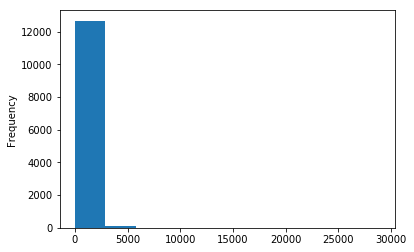

In [11]:
df['AVERAGE ALLOWED CHARGES'].plot(kind="hist")
plt.show()

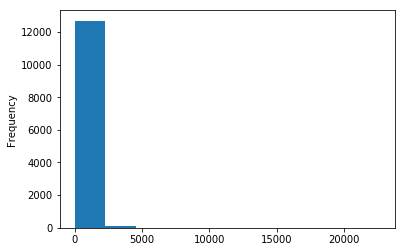

In [12]:
df['AVERAGE PAYMENT'].plot(kind="hist")
plt.show()

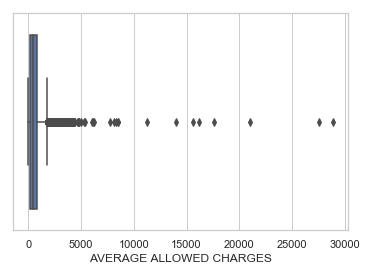

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x = df["AVERAGE ALLOWED CHARGES"])

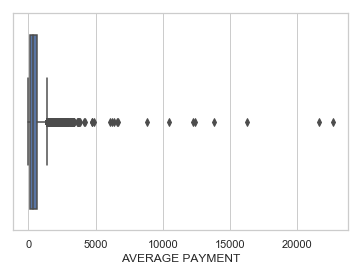

In [14]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = df["AVERAGE PAYMENT"])

In [15]:
import sklearn
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [16]:
X = df[['ALLOWED SERVICES', 'ALLOWED CHARGES', 'PAYMENT']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['PAYMENT'] for example.Alternatively, you may add additional variables within the brackets
Y = df['AVERAGE ALLOWED CHARGES']

In [17]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 615.5373561890274
Coefficients: 
 [-6.52405951e-05 -6.40754090e-05  8.39707312e-05]


In [18]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     AVERAGE ALLOWED CHARGES   R-squared:                       0.004
Model:                                 OLS   Adj. R-squared:                  0.004
Method:                      Least Squares   F-statistic:                     16.75
Date:                     Tue, 06 Nov 2018   Prob (F-statistic):           7.38e-11
Time:                             11:43:28   Log-Likelihood:            -1.0341e+05
No. Observations:                    12810   AIC:                         2.068e+05
Df Residuals:                        12806   BIC:                         2.069e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

#### Based on the Boxplot above, we set threshold for the column: "AVERAGE ALLOWED CHARGES" to be 5000. We can identify suspicious claims using this threshold.

### Function to create a Class: "Fraud" based on the Threshold set in above

In [19]:
import numpy as np
df['FRAUD CLASS'] = np.where(df['AVERAGE ALLOWED CHARGES'] <= 5000, 'Normal', 'Fraud')
df.head(100)

,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT,FRAUD CLASS
1,CARDIOVASCULAR,33010.0,OTHER,5151.0,562626.12,436220.88,109.226581,84.686639,Normal
2,CARDIOVASCULAR,33010.0,TOTAL,5151.0,562626.12,436220.88,109.226581,84.686639,Normal
4,CARDIOVASCULAR,33011.0,OTHER,84.0,9551.17,7430.49,113.704405,88.458214,Normal
5,CARDIOVASCULAR,33011.0,TOTAL,84.0,9551.17,7430.49,113.704405,88.458214,Normal
7,CARDIOVASCULAR,33015.0,OTHER,1025.0,497290.05,387598.81,485.161024,378.145180,Normal
8,CARDIOVASCULAR,33015.0,TOTAL,1025.0,497290.05,387598.81,485.161024,378.145180,Normal
9,CARDIOVASCULAR,33020.0,80S,65.0,6987.20,5384.08,107.495385,82.832000,Normal
10,CARDIOVASCULAR,33020.0,OTHER,205.0,158738.94,121909.14,774.336293,594.678732,Normal
11,CARDIOVASCULAR,33020.0,TOTAL,270.0,165726.14,127293.22,613.800519,471.456370,Normal
12,CARDIOVASCULAR,33025.0,80S,1730.0,193549.16,150276.06,111.878127,86.864775,Normal


In [20]:
df.describe()

,HCPCS,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT,AVERAGE ALLOWED CHARGES,AVERAGE PAYMENT
count,12810.000000,1.281000e+04,1.281000e+04,1.281000e+04,12810.000000,12810.000000
mean,39491.243169,2.686025e+04,3.488354e+06,2.682041e+06,615.480157,476.944536
std,15937.874868,7.098153e+05,3.192616e+07,2.462302e+07,777.358450,604.627112
min,10021.000000,1.100000e+01,9.308000e+01,7.299000e+01,2.304949,1.797031
25%,27132.000000,6.800000e+01,2.986612e+04,2.316565e+04,181.730138,140.239575
50%,35626.000000,3.200000e+02,1.446583e+05,1.118876e+05,431.764123,334.678663
75%,52273.750000,1.984750e+03,8.171013e+05,6.301469e+05,816.874857,632.580616
max,69990.000000,5.223577e+07,2.147711e+09,1.664104e+09,28868.460000,22632.877692


In [21]:
(df['AVERAGE ALLOWED CHARGES']).head(1000)

1        109.226581
2        109.226581
4        113.704405
5        113.704405
7        485.161024
8        485.161024
9        107.495385
10       774.336293
11       613.800519
12       111.878127
13       787.586998
14       611.880347
15       273.725170
16      1891.120098
17      1461.955740
18       320.460093
19      2283.528710
20      1635.231358
21       103.099189
22       670.974189
23       481.682523
24       277.746909
25      1931.978530
26      1375.890064
27       149.916000
28      1027.486136
29       753.245469
30       227.850476
31      1628.311714
32      1103.138750
           ...     
1326    1050.382256
1327     846.031848
1328     146.673994
1329    1000.394542
1330     807.448412
1331     149.374375
1332    1002.671071
1333     813.049583
1334     161.019788
1335    1060.886034
1336     862.253351
1337     191.747642
1338    1290.440729
1339    1040.275513
1340     172.092200
1341    1084.694231
1342     907.833372
1343      12.702137
1344      85.311889


In [22]:
df['FRAUD CLASS'].value_counts()

Normal    12792
Fraud        18
Name: FRAUD CLASS, dtype: int64

In [ ]:
df['FRAUD CLASS'].shape

### As expected, only very few Fraudulent cases can be found!